In [164]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [462]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import shap

In [500]:
df = pd.read_csv(r"/content/Life Expectancy Data.csv")

fill NaN values with random values from the same column

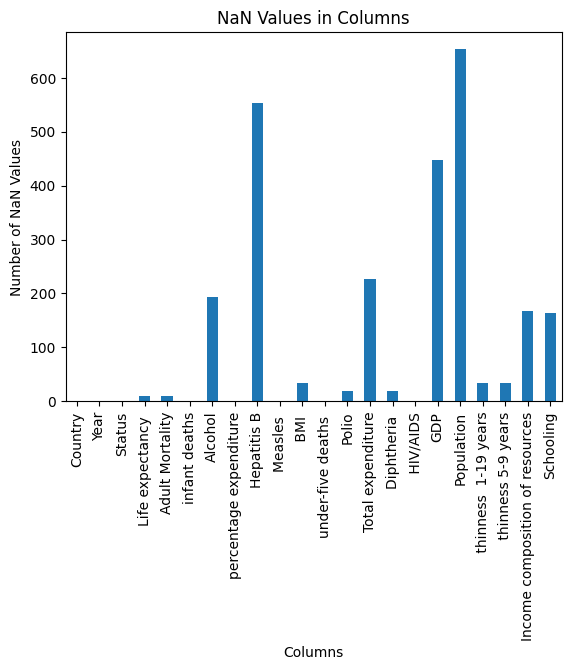

In [501]:
import matplotlib.pyplot as plt

nan_counts = df.isnull().sum()
nan_counts.plot(kind='bar')
plt.xlabel('Columns')
plt.ylabel('Number of NaN Values')
plt.title('NaN Values in Columns')
plt.xticks(rotation=90)
plt.show()

In [502]:
column_name = 'Hepatitis B'
df[column_name].fillna(df[column_name].mean(), inplace=True)
column_name = 'Alcohol'
df[column_name].fillna(df[column_name].mean(), inplace=True)
column_name = 'Population'
df[column_name].fillna(df[column_name].median(), inplace=True)
column_name = 'GDP'
df[column_name].fillna(df[column_name].median(), inplace=True)


In [503]:
for col in df.columns:
    if df[col].isnull().sum() > 0:
        fill_value = np.random.choice(df[col].dropna(), size=df[col].isnull().sum())
        df[col] = df[col].fillna(fill_value[0])


In [489]:
df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


one-hot

In [504]:
one_hot = pd.get_dummies(df['Country'])

# Concatenate the original dataframe with the one-hot encoded country columns
df_encoded = pd.concat([df, one_hot], axis=1)

#df_encoded = df_encoded.drop('Country', axis=1)
country_names = df['Country'].unique()

# Rename the columns based on the country names
df_encoded.columns = list(df.columns) + list(country_names)
#df_encoded = df_encoded.drop('Country', axis=1)
# Output the transformed dataframe
print(df_encoded)

          Country  Year      Status  Life expectancy   Adult Mortality  \
0     Afghanistan  2015  Developing              65.0            263.0   
1     Afghanistan  2014  Developing              59.9            271.0   
2     Afghanistan  2013  Developing              59.9            268.0   
3     Afghanistan  2012  Developing              59.5            272.0   
4     Afghanistan  2011  Developing              59.2            275.0   
...           ...   ...         ...               ...              ...   
2933     Zimbabwe  2004  Developing              44.3            723.0   
2934     Zimbabwe  2003  Developing              44.5            715.0   
2935     Zimbabwe  2002  Developing              44.8             73.0   
2936     Zimbabwe  2001  Developing              45.3            686.0   
2937     Zimbabwe  2000  Developing              46.0            665.0   

      infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   \
0                62     0.01    

In [491]:
df_encoded

,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,United Republic of Tanzania,United States of America,Uruguay,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Yemen,Zambia,Zimbabwe
0,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,...,0,0,0,0,0,0,0,0,0,0
1,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,...,0,0,0,0,0,0,0,0,0,0
2,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,...,0,0,0,0,0,0,0,0,0,0
3,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,...,0,0,0,0,0,0,0,0,0,0
4,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,27.1,...,0,0,0,0,0,0,0,0,0,1
2934,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,26.7,...,0,0,0,0,0,0,0,0,0,1
2935,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,26.3,...,0,0,0,0,0,0,0,0,0,1
2936,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,25.9,...,0,0,0,0,0,0,0,0,0,1


In [505]:

df_encoded1 = df_encoded
one_hot = pd.get_dummies(df_encoded1['Year'])

# Concatenate the original dataframe with the one-hot encoded country columns
df_encoded = pd.concat([df_encoded1, one_hot], axis=1)
df_encoded1['Year'] = df_encoded1['Year'].astype(str)  # Convert Year column values to string

country_names = df_encoded1['Year'].unique()

# Rename the columns based on the country names
df_encoded.columns = list(df_encoded1.columns) + list(country_names)
df_encoded = df_encoded.drop('Year', axis=1)
print(df_encoded)

          Country      Status  Life expectancy   Adult Mortality  \
0     Afghanistan  Developing              65.0            263.0   
1     Afghanistan  Developing              59.9            271.0   
2     Afghanistan  Developing              59.9            268.0   
3     Afghanistan  Developing              59.5            272.0   
4     Afghanistan  Developing              59.2            275.0   
...           ...         ...               ...              ...   
2933     Zimbabwe  Developing              44.3            723.0   
2934     Zimbabwe  Developing              44.5            715.0   
2935     Zimbabwe  Developing              44.8             73.0   
2936     Zimbabwe  Developing              45.3            686.0   
2937     Zimbabwe  Developing              46.0            665.0   

      infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   \
0                62     0.01               71.279624         65.0      1154   
1                64     0

In [506]:
df_encoded1

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,United Republic of Tanzania,United States of America,Uruguay,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Yemen,Zambia,Zimbabwe
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,0,0,0,0,0,0,0,0,0,0
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,0,0,0,0,0,0,0,0,0,0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,0,0,0,0,0,0,0,0,0,0
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,0,0,0,0,0,0,0,0,0,0
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,0,0,0,0,0,0,0,0,0,1
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,0,0,0,0,0,0,0,0,0,1
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,0,0,0,0,0,0,0,0,0,1
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,0,0,0,0,0,0,0,0,0,1


In [507]:
df_encoded1 = df_encoded
one_hot = pd.get_dummies(df_encoded1['Status'])

# Concatenate the original dataframe with the one-hot encoded country columns
df_encoded = pd.concat([df_encoded1, one_hot], axis=1)
df_encoded1['Status'] = df_encoded1['Status'].astype(str)  # Convert Year column values to string

#df_encoded = df_encoded.drop('Country', axis=1)
country_names = ["Developing","Developed"]

# Rename the columns based on the country names
df_encoded.columns = list(df_encoded1.columns) + list(country_names)
df_encoded = df_encoded.drop('Status', axis=1)
# Output the transformed dataframe
df_encoded.rename(columns={'Developing': 'temp_name'}, inplace=True)
df_encoded.rename(columns={'Developed': 'Developing'}, inplace=True)
df_encoded.rename(columns={'temp_name': 'Developed'}, inplace=True)
print(df_encoded)

          Country  Life expectancy   Adult Mortality  infant deaths  Alcohol  \
0     Afghanistan              65.0            263.0             62     0.01   
1     Afghanistan              59.9            271.0             64     0.01   
2     Afghanistan              59.9            268.0             66     0.01   
3     Afghanistan              59.5            272.0             69     0.01   
4     Afghanistan              59.2            275.0             71     0.01   
...           ...               ...              ...            ...      ...   
2933     Zimbabwe              44.3            723.0             27     4.36   
2934     Zimbabwe              44.5            715.0             26     4.06   
2935     Zimbabwe              44.8             73.0             25     4.43   
2936     Zimbabwe              45.3            686.0             25     1.72   
2937     Zimbabwe              46.0            665.0             24     1.68   

      percentage expenditure  Hepatitis

In [494]:
df_encoded

,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,...,2009,2008,2007,2006,2005,2004,2003,2002,2001,2000
0,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,...,0,0,0,0,0,0,0,0,0,1
1,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,...,0,0,0,0,0,0,0,0,1,0
2,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,...,0,0,0,0,0,0,0,1,0,0
3,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,...,0,0,0,0,0,0,1,0,0,0
4,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,44.3,723.0,27,4.36,0.000000,68.0,31,27.1,42,67.0,...,0,0,0,0,0,0,0,0,0,0
2934,44.5,715.0,26,4.06,0.000000,7.0,998,26.7,41,7.0,...,0,0,0,0,0,0,0,0,0,0
2935,44.8,73.0,25,4.43,0.000000,73.0,304,26.3,40,73.0,...,0,0,0,0,0,0,0,0,0,0
2936,45.3,686.0,25,1.72,0.000000,76.0,529,25.9,39,76.0,...,0,0,0,0,0,0,0,0,0,0


In [508]:

from sklearn.preprocessing import StandardScaler


columns = df_encoded.columns.tolist()
columns.remove("Life expectancy ")

X = df_encoded.loc[:, columns]

y = df_encoded["Life expectancy "]


# Split the data into train and test sets, ensuring that the same columns are present in both
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.1)


In [509]:
x_train1 = x_train
x_train = x_train.drop('Country', axis=1)

In [510]:
x_train1=x_train1.reset_index()

In [511]:
x_test1 = x_test
x_test = x_test.drop('Country', axis=1)

In [512]:
x_test1=x_test1.reset_index()

In [391]:
x_train_summary = shap.kmeans(x_train,100)

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning


In [513]:
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler


scaler = StandardScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)


In [514]:
model = Sequential([
    Dense(256, activation='relu', input_shape=(x_train.shape[1],)),
    Dense(128, activation='tanh'),
    Dense(1)
])
# Compile the model
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model and print loss for each epoch
history = model.fit(x_train_scaled, y_train, epochs=2000, batch_size=2644, verbose=1, validation_data=(x_test_scaled, y_test))

# Print the loss history for both train and test sets
print('Train loss:', history.history['loss'])
print('Test loss:', history.history['val_loss'])



Epoch 1/2000
1/1 [==============================] - 2s 2s/step - loss: 4890.0093 - val_loss: 4669.5063
Epoch 2/2000
1/1 [==============================] - 0s 70ms/step - loss: 4736.8428 - val_loss: 4521.1304
Epoch 3/2000
1/1 [==============================] - 0s 69ms/step - loss: 4587.8652 - val_loss: 4378.1221
Epoch 4/2000
1/1 [==============================] - 0s 85ms/step - loss: 4444.2817 - val_loss: 4241.4790
Epoch 5/2000
1/1 [==============================] - 0s 69ms/step - loss: 4307.0493 - val_loss: 4111.9985
Epoch 6/2000
1/1 [==============================] - 0s 75ms/step - loss: 4176.8882 - val_loss: 3990.2466
Epoch 7/2000
1/1 [==============================] - 0s 84ms/step - loss: 4054.3320 - val_loss: 3876.6160
Epoch 8/2000
1/1 [==============================] - 0s 83ms/step - loss: 3939.7480 - val_loss: 3771.2913
Epoch 9/2000
1/1 [==============================] - 0s 71ms/step - loss: 3833.3367 - val_loss: 3674.2937
Epoch 10/2000
1/1 [==============================] - 0s 7

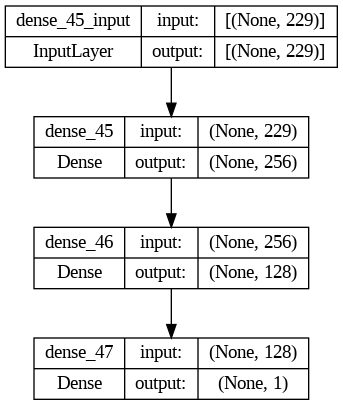

In [394]:
from tensorflow.keras.utils import plot_model

plot_model(model, to_file='model.png', show_shapes=True)

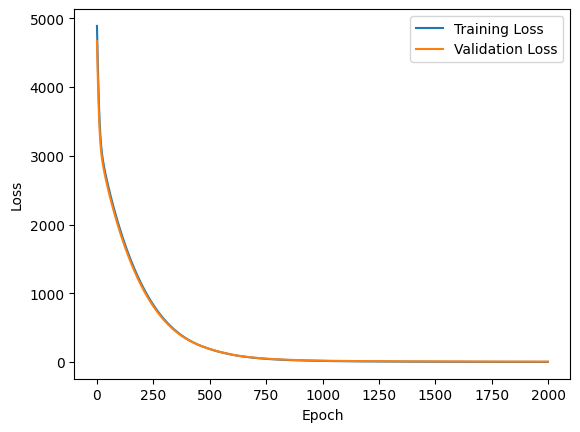

In [515]:
import matplotlib.pyplot as plt
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Create a line plot of the training and validation loss values over epochs
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [516]:
from sklearn.metrics import r2_score

# Generate predictions for the test data
y_pred = model.predict(x_test_scaled)

# Calculate the R-squared on the test data
r_squared = r2_score(y_test, y_pred)

# Print the R-squared on the test data
print("R-squared on test data: {:.2f}".format(r_squared))

10/10 [==============================] - 0s 2ms/step
R-squared on test data: 0.94


In [517]:
import numpy as np

# Convert y_test to a NumPy array and reshape it
y_test_array = y_test.to_numpy().reshape(-1, 1)

# Print the converted array
print(y_test_array)

[[72. ]
 [56.5]
 [71.2]
 [75.5]
 [77. ]
 [68. ]
 [74.1]
 [82. ]
 [51. ]
 [71.3]
 [66.1]
 [71.4]
 [68.5]
 [52. ]
 [53.6]
 [79.1]
 [62.5]
 [75.3]
 [74.7]
 [75.8]
 [83.5]
 [75.5]
 [75.1]
 [79.1]
 [51. ]
 [79.3]
 [52.2]
 [73. ]
 [44.8]
 [73.6]
 [82. ]
 [78.2]
 [55.5]
 [79.7]
 [51.6]
 [67.6]
 [61.6]
 [72.7]
 [83. ]
 [80. ]
 [81.3]
 [75.2]
 [51. ]
 [76. ]
 [59.4]
 [69.3]
 [76. ]
 [81. ]
 [61.9]
 [53.4]
 [73. ]
 [73.9]
 [79.4]
 [71. ]
 [61.1]
 [66. ]
 [64.1]
 [67. ]
 [64.2]
 [85. ]
 [74.2]
 [79. ]
 [39. ]
 [61.6]
 [78.5]
 [73. ]
 [79. ]
 [66.6]
 [53.5]
 [67.5]
 [66.9]
 [75.2]
 [72. ]
 [75.4]
 [58.9]
 [87. ]
 [62.5]
 [54. ]
 [56.7]
 [78.6]
 [51.4]
 [81.1]
 [74. ]
 [52.8]
 [73. ]
 [56.7]
 [47.8]
 [74.3]
 [62. ]
 [65.3]
 [78.9]
 [64.7]
 [65.1]
 [67. ]
 [74.2]
 [69. ]
 [67.6]
 [74.6]
 [78. ]
 [62.8]
 [62.3]
 [68.2]
 [68.9]
 [51.5]
 [76.2]
 [63.8]
 [89. ]
 [81. ]
 [77.6]
 [75. ]
 [79.9]
 [48.8]
 [67.3]
 [72.9]
 [73.5]
 [76. ]
 [67.9]
 [74.7]
 [74.4]
 [75. ]
 [54.1]
 [55.6]
 [74.3]
 [59.3]
 [78.8]


In [215]:
x_train1

,index,Country,Status,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,2009,2008,2007,2006,2005,2004,2003,2002,2001,2000
0,1107,Guyana,1,217.0,0,7.640000,4.141293,98.000000,0,45.9,...,0,0,0,0,0,0,0,0,1,0
1,2390,Somalia,1,348.0,47,0.010000,0.000000,80.940461,9559,18.6,...,0,0,0,0,0,0,0,0,0,0
2,872,Estonia,1,156.0,0,15.040000,1717.088711,95.000000,0,57.1,...,0,0,0,1,0,0,0,0,0,0
3,816,Egypt,1,177.0,63,0.140000,0.000000,99.000000,2150,51.2,...,0,0,0,0,0,0,0,0,0,0
4,2196,Saint Vincent and the Grenadines,1,184.0,0,5.100000,0.000000,31.000000,0,42.9,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2639,314,Bolivia (Plurinational State of),1,222.0,12,2.860000,0.000000,85.000000,0,46.0,...,0,0,0,0,0,0,0,0,0,0
2640,1983,Papua New Guinea,1,295.0,11,0.710000,85.717538,61.000000,0,42.7,...,0,1,0,0,0,0,0,0,0,0
2641,2268,Serbia,1,126.0,1,9.380000,742.510971,97.000000,0,58.3,...,0,0,0,0,0,0,1,0,0,0
2642,2071,Qatar,1,68.0,0,4.602861,0.000000,99.000000,18,69.3,...,0,0,0,0,0,0,0,0,0,1


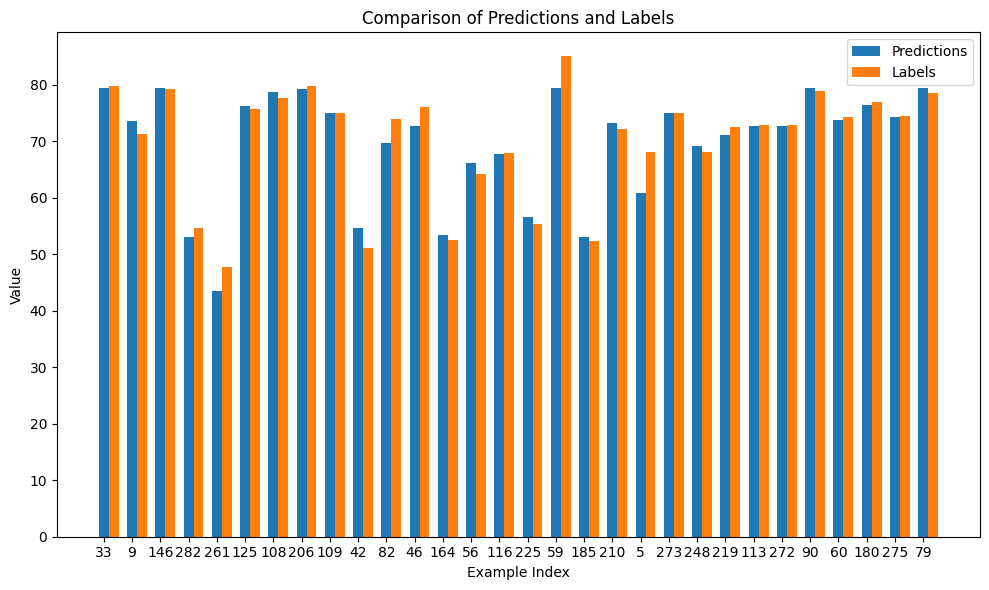

In [518]:
import matplotlib.pyplot as plt
import numpy as np

# Generate random indices
np.random.seed(42)
random_indices = np.random.choice(len(y_test_array), size=30, replace=False)

# Select the predictions and labels for the random examples
selected_y_pred = y_pred[random_indices].flatten()
selected_y_test = y_test_array[random_indices].flatten()

# Create an array for the x-axis positions
x_positions = np.arange(len(selected_y_pred))

# Specify the width of each bar
bar_width = 0.35

# Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar(x_positions, selected_y_pred, width=bar_width, align='center', label='Predictions')
plt.bar(x_positions + bar_width, selected_y_test, width=bar_width, align='center', label='Labels')
plt.xticks(x_positions, random_indices)  # Set x-axis ticks as the random indices
plt.xlabel('Example Index')
plt.ylabel('Value')
plt.title('Comparison of Predictions and Labels')
plt.legend()
plt.tight_layout()
plt.show()

In [519]:
x_train_summary = shap.kmeans(x_train_scaled, 20).data

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning


Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.
`tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.


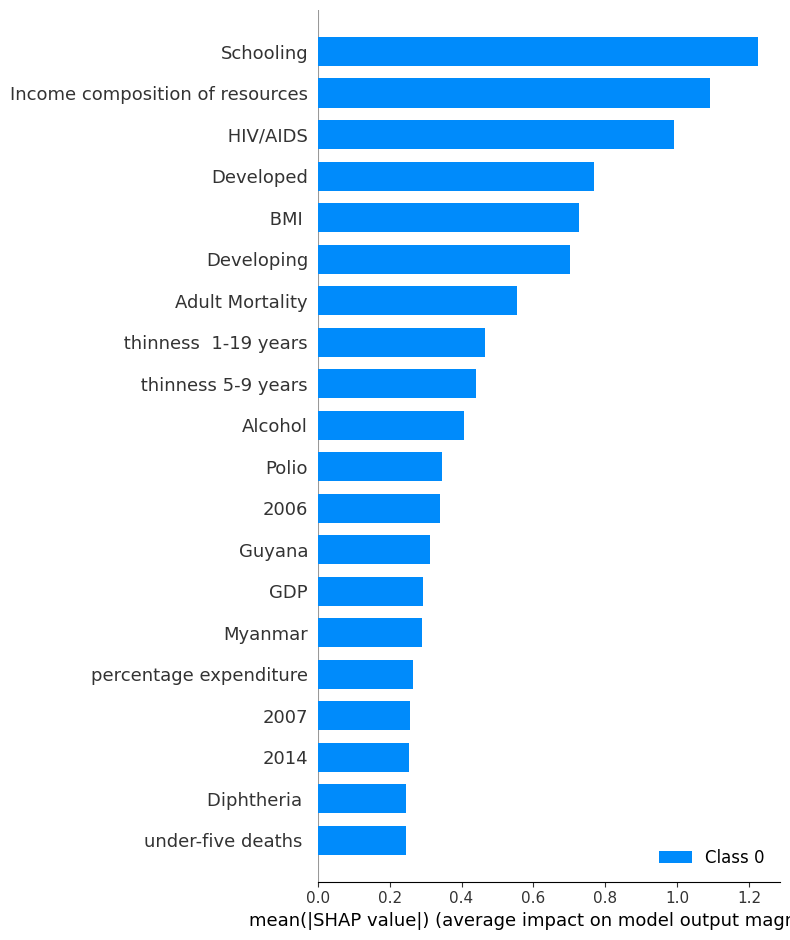

In [520]:
# Use DeepExplainer to generate SHAP values
explainer = shap.DeepExplainer(model, x_train_summary)
shap_values = explainer.shap_values(x_test_scaled)

# Generate a summary plot of the SHAP values for each feature in the test data
shap.summary_plot(shap_values, x_test, plot_type="bar", feature_names=x_test.columns, show=True)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


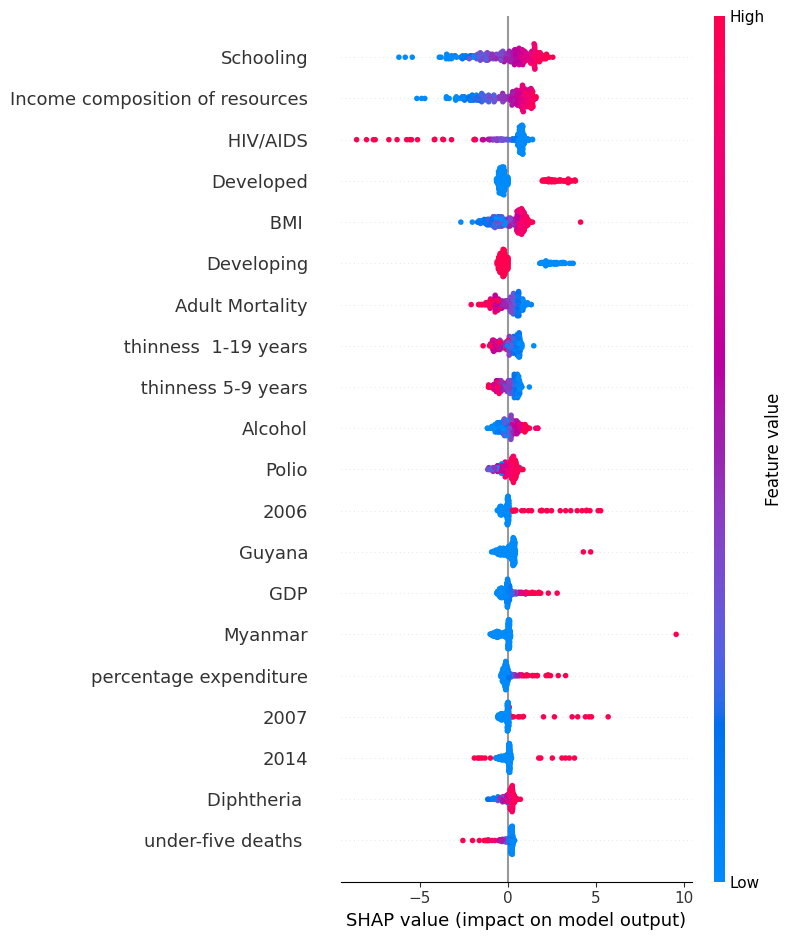

In [521]:
# Generate a summary plot of the SHAP values for each feature in the test data
shap.summary_plot(shap_values[0], x_test, feature_names=x_train.columns)

In [352]:
x_train

,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,...,2007,2006,2005,2004,2003,2002,2001,2000,Developed,Developing
1107,217.0,0,7.640000,4.141293,98.000000,0,45.9,1,97.0,5.25,...,0,0,0,0,0,0,1,0,0,1
2390,348.0,47,0.010000,0.000000,80.940461,9559,18.6,77,4.0,5.58,...,0,0,0,0,0,0,0,0,0,1
872,156.0,0,15.040000,1717.088711,95.000000,0,57.1,0,95.0,6.93,...,0,1,0,0,0,0,0,0,0,1
816,177.0,63,0.140000,0.000000,99.000000,2150,51.2,78,99.0,5.75,...,0,0,0,0,0,0,0,0,0,1
2196,184.0,0,5.100000,0.000000,31.000000,0,42.9,0,99.0,3.91,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
314,222.0,12,2.860000,0.000000,85.000000,0,46.0,16,84.0,5.67,...,0,0,0,0,0,0,0,0,0,1
1983,295.0,11,0.710000,85.717538,61.000000,0,42.7,14,72.0,4.40,...,0,0,0,0,0,0,0,0,0,1
2268,126.0,1,9.380000,742.510971,97.000000,0,58.3,1,93.0,9.89,...,0,0,0,0,1,0,0,0,0,1
2071,68.0,0,4.602861,0.000000,99.000000,18,69.3,0,99.0,5.58,...,0,0,0,0,0,0,0,1,0,1


In [353]:
x_train1

,Country,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,...,2007,2006,2005,2004,2003,2002,2001,2000,Developed,Developing
1107,Guyana,217.0,0,7.640000,4.141293,98.000000,0,45.9,1,97.0,...,0,0,0,0,0,0,1,0,0,1
2390,Somalia,348.0,47,0.010000,0.000000,80.940461,9559,18.6,77,4.0,...,0,0,0,0,0,0,0,0,0,1
872,Estonia,156.0,0,15.040000,1717.088711,95.000000,0,57.1,0,95.0,...,0,1,0,0,0,0,0,0,0,1
816,Egypt,177.0,63,0.140000,0.000000,99.000000,2150,51.2,78,99.0,...,0,0,0,0,0,0,0,0,0,1
2196,Saint Vincent and the Grenadines,184.0,0,5.100000,0.000000,31.000000,0,42.9,0,99.0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
314,Bolivia (Plurinational State of),222.0,12,2.860000,0.000000,85.000000,0,46.0,16,84.0,...,0,0,0,0,0,0,0,0,0,1
1983,Papua New Guinea,295.0,11,0.710000,85.717538,61.000000,0,42.7,14,72.0,...,0,0,0,0,0,0,0,0,0,1
2268,Serbia,126.0,1,9.380000,742.510971,97.000000,0,58.3,1,93.0,...,0,0,0,0,1,0,0,0,0,1
2071,Qatar,68.0,0,4.602861,0.000000,99.000000,18,69.3,0,99.0,...,0,0,0,0,0,0,0,1,0,1


In [362]:
x_test1=x_test1.reset_index()

In [363]:
x_test1

,index,Country,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,...,2007,2006,2005,2004,2003,2002,2001,2000,Developed,Developing
0,179,Bahrain,71.0,0,1.70,2211.215778,99.0,0,61.5,0,...,0,0,0,0,1,0,0,0,0,1
1,93,Argentina,138.0,12,7.81,470.186915,66.0,0,55.1,13,...,0,0,0,0,0,0,0,0,0,1
2,1148,Honduras,163.0,5,3.23,203.713488,97.0,0,42.8,6,...,0,0,0,0,0,0,0,0,0,1
3,1563,Madagascar,263.0,36,0.68,38.418704,82.0,2,16.3,54,...,0,0,0,0,0,0,0,0,0,1
4,1356,Kazakhstan,294.0,8,6.94,351.860327,94.0,16118,46.3,9,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,119,Australia,66.0,1,10.76,8547.292357,94.0,65,62.9,1,...,1,0,0,0,0,0,0,0,1,0
290,2095,Republic of Korea,77.0,2,9.05,0.000000,91.0,194,28.2,2,...,0,0,0,0,0,0,0,0,0,1
291,1690,Mexico,127.0,37,5.36,159.877226,97.0,0,58.7,43,...,1,0,0,0,0,0,0,0,0,1
292,1583,Malawi,67.0,46,1.10,3.885395,64.0,92,14.8,75,...,0,0,0,0,0,0,0,0,0,1


In [522]:
value = 'Afghanistan'
sample_indexes = x_test1.index[x_test1['Country'] == value].tolist()
print(sample_indexes)

[223, 233]


In [526]:
value = 'Japan'
sample_indexes = x_test1.index[x_test1['Country'] == value].tolist()
print(sample_indexes)

[20, 284]


In [ ]:
#x_test1.reset

In [523]:
shap_values = explainer.shap_values(x_test_scaled)

In [416]:
#sample = x_test1.iloc[144]

In [418]:
#print(sample)

index               1326
Country            Japan
Adult Mortality      7.0
infant deaths          3
Alcohol             7.83
                   ...  
2002                   0
2001                   0
2000                   0
Developed              1
Developing             0
Name: 144, Length: 231, dtype: object


In [527]:
#y_test.iloc[284]

82.7

In [529]:
instance_index = 233
shap.initjs()


# Generate the force plot for the specific instance
shap.force_plot(explainer.expected_value.numpy()[0], shap_values[0][instance_index], x_test.iloc[instance_index])

In [530]:
instance_index = 284
shap.initjs()


# Generate the force plot for the specific instance
shap.force_plot(explainer.expected_value.numpy()[0], shap_values[0][instance_index], x_test.iloc[instance_index])

In [534]:
x_train_summary = shap.kmeans(x_train_scaled, 10).data

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning


In [ ]:
# Use kernel Explainer to generate SHAP values
explainer = shap.KernelExplainer(model, x_train_summary)
shap_values = explainer.shap_values(x_test_scaled)



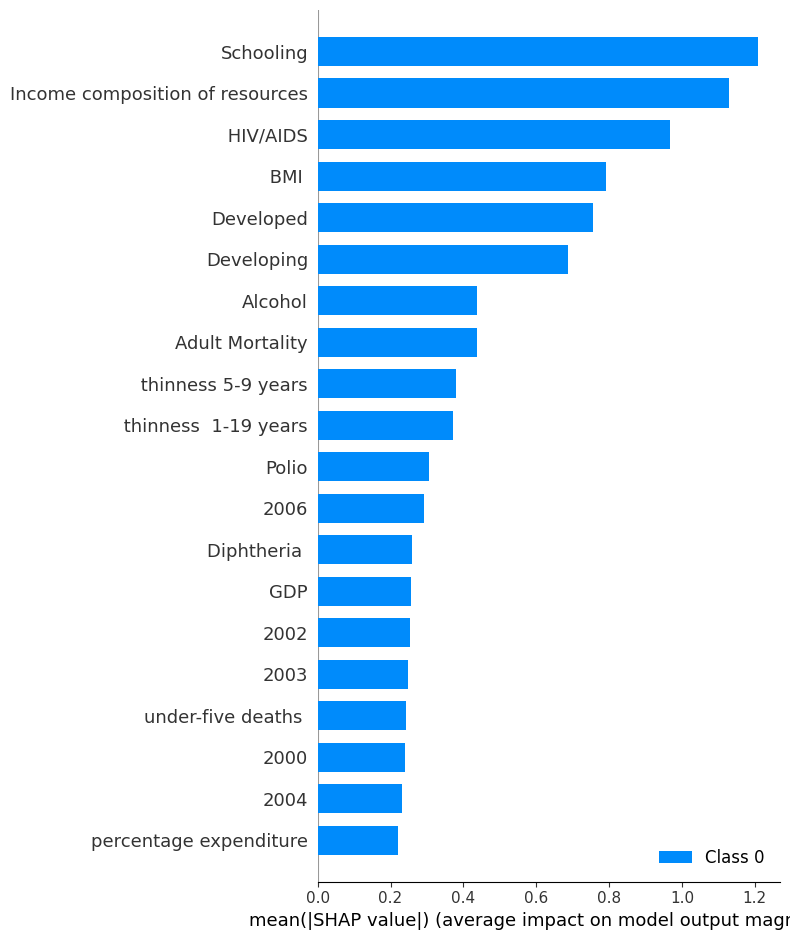

In [541]:
shap.summary_plot(shap_values, x_test, plot_type="bar", feature_names=x_test.columns, show=True)


In [ ]:
shap_values = explainer.shap_values(x_test_scaled)


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


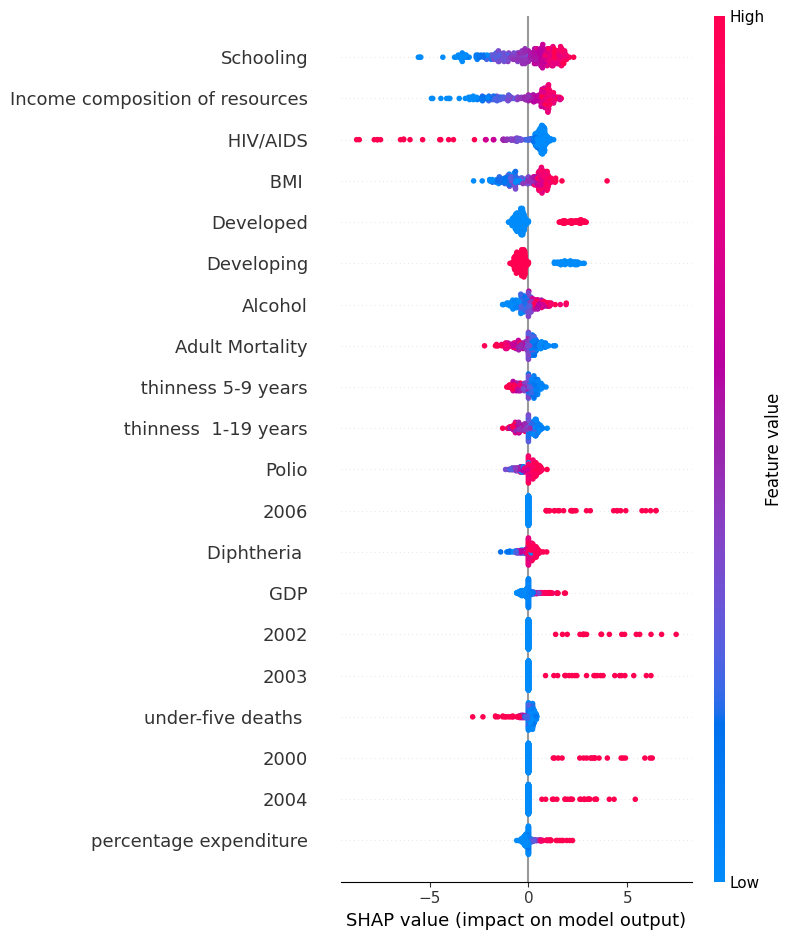

In [540]:
shap.summary_plot(shap_values[0], x_test, feature_names=x_test.columns)

In [ ]:
explainer.expected_value[0]

67.3645913696289

In [543]:
instance_index = 233
shap.initjs()


# Generate the force plot for the specific instance
shap.force_plot(explainer.expected_value[0], shap_values[0][instance_index], x_test.iloc[instance_index])

In [547]:
instance_index = 284
shap.initjs()


# Generate the force plot for the specific instance
shap.force_plot(explainer.expected_value[0], shap_values[0][instance_index], x_test.iloc[instance_index])